In [93]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
Dataset = pd.read_csv('Position_Salaries.csv')
X = Dataset.iloc[:,1:-1].values
Y = Dataset.iloc[:,-1].values

In [95]:
X.shape

(10, 1)

In [96]:
Y.shape

(10,)

In [97]:
X = X[:7,:]
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [98]:
Y = Y[:7]
Y

array([ 45000,  50000,  60000,  80000, 110000, 150000, 200000])

In [364]:
class PolynomailRegression() :

    def __init__( self, degree, learning_rate, iterations ) : 
        self.degree = degree
        self.learning_rate = learning_rate        
        self.iterations = iterations
         

     
    def transform( self, X ) :
        
        X_poly = np.ones( ( self.m, 1 ) )
        for j in range( self.degree + 1 ) :
             
            if j != 0 : 
                x_new = np.power( X, j )
                X_poly = np.append( X_poly, x_new.reshape( -1, 1 ), axis = 1 )
 
        return X_poly  
     

     
    def normalize( self, X ) :
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
        return X

     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        self.W = np.random.randn( self.degree + 1 )*1000
         
        X_transform = self.transform( self.X )        
        m = Y.shape[0]
        X_normalize = self.normalize( X_transform )
        for i in range( self.iterations ) : 
            h = self.predict( self.X )
            cost = np.sum(np.power(np.abs(self.Y-h),7))/7
            error = (h-self.Y)**6
            if(np.max(np.abs(error))>10000000):
              error = error*10000000/np.linalg.norm(error)
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
         
        return self
     

     
    def predict( self, X ) :
        X_poly = self.transform(X)
        X_poly = self.normalize(X_poly)
        return np.dot( X_poly, self.W )

In [367]:
 model = PolynomailRegression( degree = 2, learning_rate = 0.000001, iterations = 10000)
 model.fit( X, Y )

In [368]:
Y_pred = model.predict( X )
Y_pred

array([ 48585.87925135,  31791.1265819 ,  11852.45810866, -11230.12616838,
       -37456.62624922, -66827.04213385, -99341.37382228])

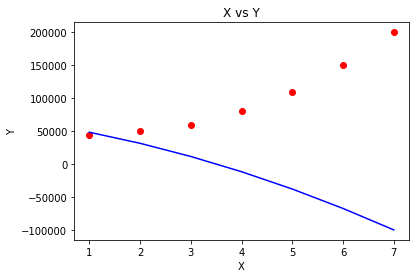

In [372]:
plt.scatter( X, Y, color = 'red' )
     
plt.plot( X, Y_pred, color = 'blue' )
     
plt.title( 'X vs Y' )
     
plt.xlabel( 'X' )
     
plt.ylabel( 'Y' )
     
plt.show()